In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Read COVID data and aggregate them by date and country

In [2]:
df=pd.read_csv('covid_19_data.csv')
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [3]:
df.tail()

SNo ObservationDate      Province/State  Country/Region  \
64128  64129      07/14/2020           Zacatecas          Mexico   
64129  64130      07/14/2020  Zakarpattia Oblast         Ukraine   
64130  64131      07/14/2020   Zaporizhia Oblast         Ukraine   
64131  64132      07/14/2020            Zhejiang  Mainland China   
64132  64133      07/14/2020     Zhytomyr Oblast         Ukraine   

               Last Update  Confirmed  Deaths  Recovered  
64128  2020-07-15 04:34:39     1488.0   145.0     1008.0  
64129  2020-07-15 04:34:39     4055.0   140.0     1301.0  
64130  2020-07-15 04:34:39      622.0    20.0      521.0  
64131  2020-07-15 04:34:39     1270.0     1.0     1267.0  
64132  2020-07-15 04:34:39     1542.0    34.0     1157.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64133 entries, 0 to 64132
Data columns (total 8 columns):
SNo                64133 non-null int64
ObservationDate    64133 non-null object
Province/State     40710 non-null object
Country/Region     64133 non-null object
Last Update        64133 non-null object
Confirmed          64133 non-null float64
Deaths             64133 non-null float64
Recovered          64133 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 3.9+ MB


In [5]:
df1 = df.copy()

In [6]:
df1 = df1.groupby(['ObservationDate','Country/Region'])['Confirmed'].sum()

In [7]:
df1= df1.reset_index()

In [8]:
df1.tail()

ObservationDate      Country/Region  Confirmed
25336      07/14/2020  West Bank and Gaza     6764.0
25337      07/14/2020      Western Sahara       10.0
25338      07/14/2020               Yemen     1516.0
25339      07/14/2020              Zambia     1895.0
25340      07/14/2020            Zimbabwe     1064.0

### Visualize the total number of number of cases spreading in the world 

In [10]:
import wget 
# download countries geojson file
#!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
world_geo = wget.download( 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json')    
print('GeoJSON file downloaded!')

100% [............................................................................] 252515 / 252515GeoJSON file downloaded!


In [11]:
# Creating the visualization
fig = px.choropleth(df1, 
                    locations="Country/Region", 
                    locationmode = "country names",
                    color="Confirmed", 
                    hover_name="Country/Region", 
                    animation_frame="ObservationDate"
                   )
fig.update_layout(
    title_text = 'COVID 19 global spread - cumulative case number',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
fig.show()

In [13]:
df4 = df1.copy()

In [14]:
df4.sort_values(['Country/Region','ObservationDate'], inplace=True)
df4['diffs'] = df4['Confirmed'].diff()

In [15]:
mask = df4['Country/Region'] != df4['Country/Region'].shift(1)
df4['diffs'][mask] = np.nan

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [16]:
df4[df4['diffs'] < 0] = 0

In [18]:
df5 = df4.sort_values(['ObservationDate','Country/Region'])

### Visualize the total new number of number of daily cases spreading in the world 

In [19]:
# Creating the visualization
fig = px.choropleth(df5, 
                    locations="Country/Region", 
                    locationmode = "country names",
                    color="diffs", 
                    hover_name="Country/Region", 
                    animation_frame="ObservationDate"
                   )
fig.update_layout(
    title_text = 'COVID 19 global spread - daily difference',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
fig.show()

### What country has the highest count of cases? Which one has the smallest?

In [20]:
df6 = df.groupby(['Country/Region'])['Confirmed'].sum()
df6 = df6.reset_index()
df6.sort_values('Confirmed',ascending = False)[:10]
#print(df6)

Country/Region    Confirmed
208             US  173306588.0
27          Brazil   60900888.0
168         Russia   35246619.0
95           India   25117145.0
188          Spain   24065471.0
101          Italy   23559031.0
207             UK   23521672.0
70          France   18675212.0
76         Germany   18407726.0
97            Iran   15712195.0

In [21]:
df7 = df.groupby(['Country/Region'])['Confirmed'].sum()
df7 = df7.reset_index()
df7.sort_values('Confirmed')[:10]
#print(df6)

Country/Region  Confirmed
0               Azerbaijan        1.0
41         Channel Islands        1.0
58              East Timor        1.0
148          North Ireland        1.0
165  Republic of the Congo        1.0
37              Cape Verde        1.0
201             The Gambia        1.0
1          ('St. Martin',)        2.0
50                 Curacao        2.0
190             St. Martin        2.0

In [22]:
df4.sort_values('diffs', ascending = False)[:10]

ObservationDate Country/Region  Confirmed    diffs
25328      07/14/2020             US  3431574.0  67417.0
24568      07/10/2020             US  3184573.0  66627.0
24378      07/09/2020             US  3117946.0  63247.0
24758      07/11/2020             US  3245925.0  61352.0
23998      07/07/2020             US  2996098.0  60021.0
25138      07/13/2020             US  3364157.0  59215.0
24948      07/12/2020             US  3304942.0  59017.0
24188      07/08/2020             US  3054699.0  58601.0
20424      06/19/2020         Brazil  1032913.0  54771.0
23238      07/03/2020             US  2794153.0  54274.0

### forecast covid over the next 3 months in the USA

In [24]:
dff = df.loc[df["Country/Region"] == 'US']

In [25]:
dff = dff.groupby(['ObservationDate'])['Confirmed'].sum()
dff = dff.reset_index()

In [26]:
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

#plot actual and predicted
plot_data = [

go.Scatter(
        x=dff["ObservationDate"],
        y=dff["Confirmed"],
        name='Cumulative # of cases'
    )
]

plot_layout = go.Layout(
        title='Cumulative # of cases in USA'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [27]:
dff.head()

ObservationDate  Confirmed
0      01/22/2020        1.0
1      01/23/2020        1.0
2      01/24/2020        2.0
3      01/25/2020        2.0
4      01/26/2020        5.0

In [28]:
dff['diffs'] = dff['Confirmed'].diff()

In [29]:
dff.head()

ObservationDate  Confirmed  diffs
0      01/22/2020        1.0    NaN
1      01/23/2020        1.0    0.0
2      01/24/2020        2.0    1.0
3      01/25/2020        2.0    0.0
4      01/26/2020        5.0    3.0

In [30]:
dff= dff.fillna(0)

In [31]:
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

#plot actual and predicted
plot_data = [

go.Scatter(
        x=dff["ObservationDate"],
        y=dff["diffs"],
        name='Increase # of cases'
    )
]

plot_layout = go.Layout(
        title= ' Day over day # of cases in USA'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [32]:
dff = dff.rename(columns={'ObservationDate': 'ds',
                        'Confirmed': 'y'})

dff.head(5)

ds    y  diffs
0  01/22/2020  1.0    0.0
1  01/23/2020  1.0    0.0
2  01/24/2020  2.0    1.0
3  01/25/2020  2.0    0.0
4  01/26/2020  5.0    3.0

In [ ]:
dff.head()

In [33]:
dff.drop(['diffs'], axis = 1, inplace=True)

In [34]:
dff.head()

ds    y
0  01/22/2020  1.0
1  01/23/2020  1.0
2  01/24/2020  2.0
3  01/25/2020  2.0
4  01/26/2020  5.0

In [35]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
ds    175 non-null object
y     175 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [36]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from fbprophet import Prophet

### How many cases will there be in the US in two months ahead? Using Prophet

In [37]:
# Create a column that will store the year
dff['ds'] = pd.DatetimeIndex(dff['ds'])

In [38]:
dff.tail()

ds          y
170 2020-07-10  3184573.0
171 2020-07-11  3245925.0
172 2020-07-12  3304942.0
173 2020-07-13  3364157.0
174 2020-07-14  3431574.0

In [50]:
model = Prophet(daily_seasonality=False)
model.fit(dff)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [51]:
future = model.make_future_dataframe(periods=60, freq = 'd')
future.tail()

ds
230 2020-09-08
231 2020-09-09
232 2020-09-10
233 2020-09-11
234 2020-09-12

In [52]:
forecast = model.predict(future)

In [53]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
230 2020-09-08  5.408825e+06  4.999350e+06  5.820731e+06
231 2020-09-09  5.439933e+06  5.028432e+06  5.857261e+06
232 2020-09-10  5.480137e+06  5.049423e+06  5.905732e+06
233 2020-09-11  5.521894e+06  5.086149e+06  5.940691e+06
234 2020-09-12  5.562349e+06  5.113786e+06  6.006211e+06

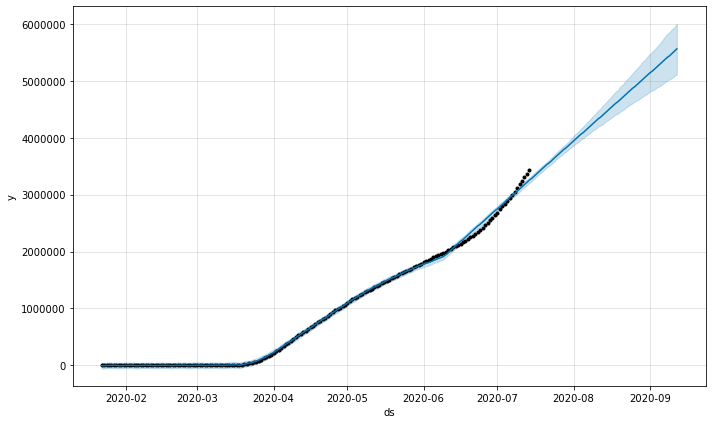

In [54]:
model.plot(forecast);

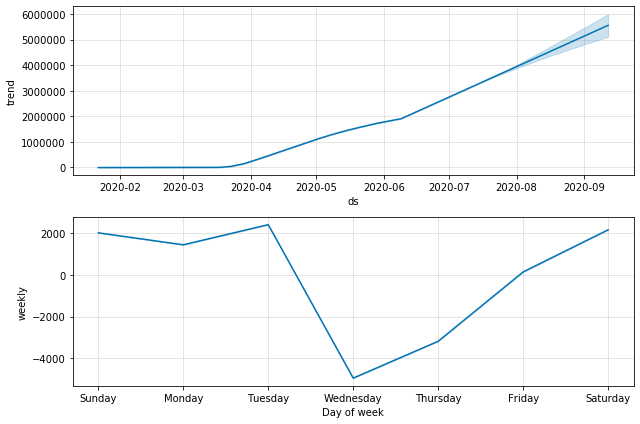

In [55]:
model.plot_components(forecast);

In [60]:
dff.head()

ds    y
0 2020-01-22  1.0
1 2020-01-23  1.0
2 2020-01-24  2.0
3 2020-01-25  2.0
4 2020-01-26  5.0

In [61]:
dff = dff.set_index('ds')

### How many cases will there be in the US in two months ahead? Using Arima

In [56]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [62]:
# Define the p, d and q parameters to take any value between 0 and 2
p = range(0,3)
d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [63]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dff,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5427.3708853499065
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4964.027116504769
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:4622.454124671931
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4538.965552414846
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4192.276761935862
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:4139.565738267813
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:3890.4001245759855
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:3546.321850053788
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:3375.8728985684584
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4314.291682254557
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4203.09017713861
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:4122.206175362254
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3893.2542125532864
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3893.0027358232624
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:3573.2186917601543
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:3563.44611472176
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:3527.4045748425538
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:3230.6267682434273
ARIM

In [66]:
(results.aic)

2409.0829134466326

In [67]:
#mod = sm.tsa.statespace.SARIMAX(df,
 #                               order=(0,0, 2),
  #                              seasonal_order=(2, 2, 0, 12),
   #                             enforce_stationarity=False,
        #                        enforce_invertibility=False)
mod = sm.tsa.statespace.SARIMAX(dff,
                                order=(2,2, 2),
                                seasonal_order=(2, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)




        
        
        
        
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2455      0.135      9.251      0.000       0.982       1.509
ar.L2         -0.9564      0.141     -6.770      0.000      -1.233      -0.680
ma.L1         -1.4644      0.130    -11.268      0.000      -1.719      -1.210
ma.L2          0.9516      0.131      7.274      0.000       0.695       1.208
ar.S.L12      -0.4243      1.452     -0.292      0.770      -3.269       2.421
ar.S.L24      -0.1368      1.005     -0.136      0.892      -2.107       1.833
ma.S.L12      -1.2547      1.302     -0.964      0.335      -3.806       1.297
ma.S.L24       0.3765      1.382      0.273      0.785      -2.331       3.084
sigma2      3.879e+07   3.63e-08   1.07e+15      0.000    3.88e+07    3.88e+07


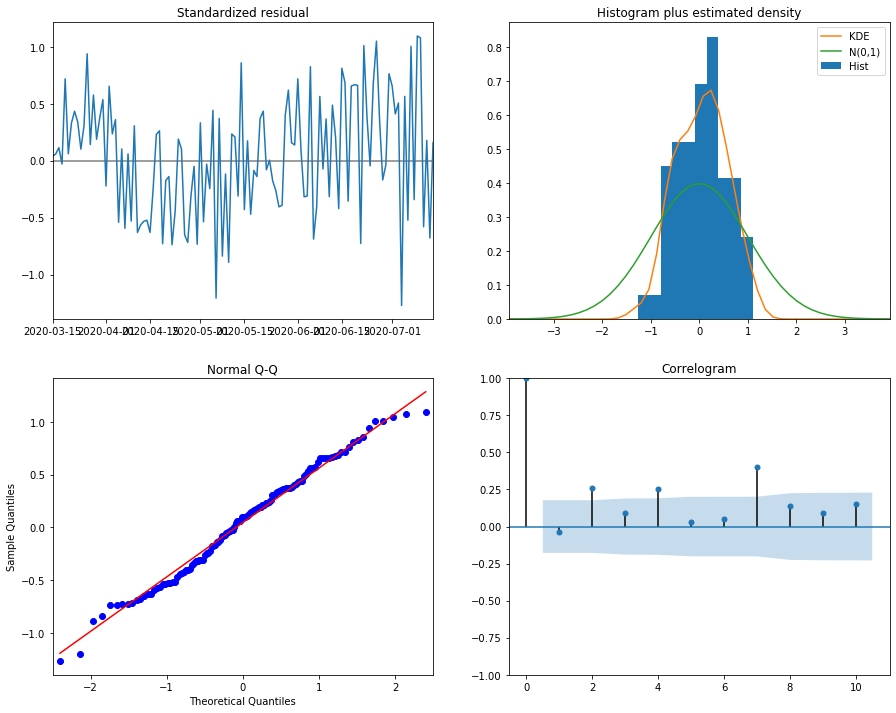

In [68]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [84]:
pred = results.get_prediction(start=pd.to_datetime('2020-06-15'), dynamic=False)
pred_ci = pred.conf_int()

In [85]:
y_forecasted = pred.predicted_mean.values
y_truth = dff['2020-06-15':].values
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 317459587392.79
The Root Mean Squared Error is 563435.52


In [86]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=60)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [87]:
pd.plotting.register_matplotlib_converters()

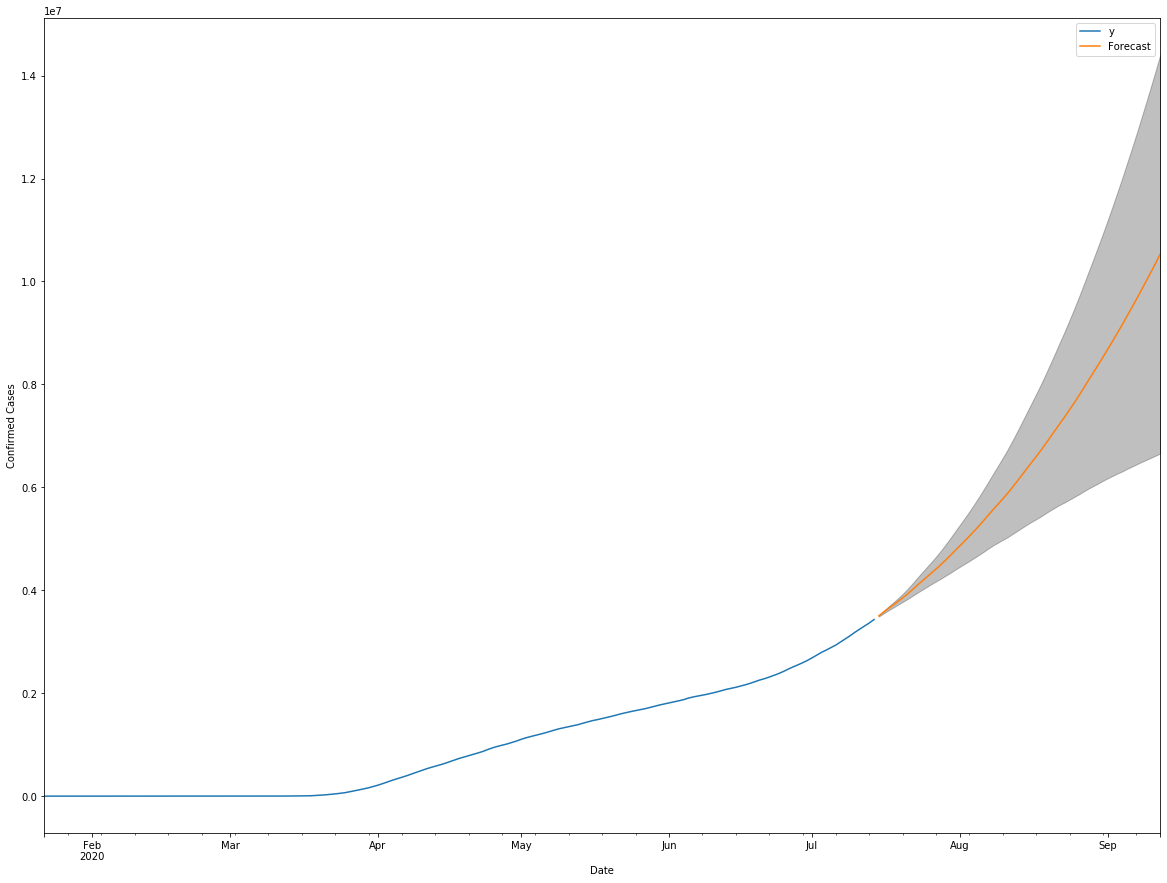

In [88]:
ax = dff.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')

plt.legend()
plt.show()